
# Project: GAPMINDER DATA ANALYSIS

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Gapminder has gathered information on how people live their lives from several countries across the globe based on several indicators such as income, population, life expectancy, child mortality, total fertility rate etc. For my analysis,I have chosen 3 indicators namely;income per person, life expectancy and child mortality.
These indicators are in 3 different csv datasets which I will merge to form one dataframe for my analysis.

>The datasets originally have columns being country name and each year for each column.However,it will be reshaped and merged to have columns:
>- country
>- year
>- income_per_person (in dollars)
>- life_expectancy (years)
>- child_mortality (0-5 years dying per 1000 born)
 


### Questions for Analysis
>- Have certain continents of the world been growing in child mortality,income per person,life expectancy?
>- Which continents have the highest child mortality rates,life expectancy and income per person?
>- Which continent has the lowest child mortality rates,life expectancy and income per person?
>- What is the average child mortality rate of each continent?
>- What is the average life expectancy of each continent?
>- What is the average income per person of each continent?
>- Is there any relation between income and life expectancy?
>- Is there any relation between income and child mortality?. 

In [1]:
#import necessary packages for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pycountry_convert as pc

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Load the 3 datasets 
df_gdp = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_life = pd.read_csv('life_expectancy_years.csv')
df_mort = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born (2).csv')


>Views the characteristics of the 3 different datasets to know the number of samples, columns and data types of each dataset in order to put them in a shape good enough to be merged to form one dataframe for further cleaning or manipulation.

In [74]:
df_gdp.head(3)

,country,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,563,1190,1240,1200,1290,1320,1460,1480,1760,...,2120,2100,2070,2060,2060,2030,2070,1920,1950,1990
1,Angola,2490,2900,3120,3520,4270,5560,6920,7820,7750,...,8140,8240,8040,7570,7310,6930,6670,6220,6060,6020
2,Albania,6460,6780,7180,7610,8070,8600,9180,9940,10.3k,...,11.4k,11.6k,11.9k,12.3k,12.8k,13.4k,13.7k,13.3k,13.9k,14.5k


In [3]:
# find datatypes and columns in income_per_person(gdp)dataset
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 252 entries, country to 2050
dtypes: int64(103), object(149)
memory usage: 384.0+ KB


In [4]:
#number of columns and rows in income_per_person(gdp) dataset
df_gdp.shape

(195, 252)

In [5]:
#find the number of duplicates in income_per_person(gdp) dataset
sum(df_gdp.duplicated())

0

**Observation**
- There are 252 columns, from country to year 2050 in this dataset
- This dataset has 103 columns to be integer datatype and 149 columns with string 
- There 195 rows and no duplicates in this dataset

In [6]:
# find datatypes and columns in life expectancy dataset
df_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 460.2+ KB


In [7]:
#number of columns and rows in life expectancy dataset
df_life.shape

(195, 302)

In [8]:
#find the number of duplicates in life expectancy dataset
sum(df_life.duplicated())

0

**Observation**
- There are 302 columns, from country to year 2100 in this dataset
- This dataset has 301 columns to be float datatype and 1 column with string 
- There 195 rows and no duplicates in this dataset

In [9]:
# find datatypes and columns in child mortality dataset
df_mort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 464.9+ KB


In [10]:
#number of columns and rows in child mortality dataset
df_mort.shape

(197, 302)

In [11]:
#find the number of duplicates in child mortality dataset
sum(df_mort.duplicated())

0

**Observation**
- There are 302 columns, from country to year 2100 in this dataset
- This dataset has 301 columns to be float datatype and 1 column with string 
- There 197 rows and no duplicates in this dataset


## Data Cleaning


>The following code cells look at: 
>- Dropping the years of each dataset from 2023 to 2100/2050 and from 1799 to 2000 so that all datasets have years starting at 2001 and ending at 2022.
>- Reshaping each dataset to have columns: country, year, life_expectancy/income_per_person/child_mortality.
         
>This is to make the datasets have:
>- the same years as well as to narrow down the years for analysis.
>- structure or shape to make it easy to merge and analyse.

In [12]:
#drop years income per person dataset from 2023 to 2050
df_gdp.drop(df_gdp.iloc[:,224:252], axis=1, inplace=True)

In [13]:
#drop years from 1799 to 2000
df_gdp.drop(df_gdp.iloc[:,1:202], axis=1, inplace=True)

In [14]:
#drop years of life expaectancy dataset from 2023 to 2100 
df_life.drop(df_life.iloc[:,224:302], axis=1, inplace=True)

In [15]:
#drop years from 1799 to 2000
df_life.drop(df_life.iloc[:,1:202], axis=1, inplace=True)

In [16]:
#drop years of child mortality dataset from 2023 to 2100
df_mort.drop(df_mort.iloc[:,224:302], axis=1, inplace=True)

In [17]:
#drop years from 1799 to 2000
df_mort.drop(df_mort.iloc[:,1:202], axis=1, inplace=True)

In [18]:
#rehape income dataframe to columns; country, year and income_per_person
df_gdp1=df_gdp.melt(id_vars='country',var_name= 'year', value_name= 'income_per_person')

In [19]:
#check shape of dataframe and check that year starts from 2100
df_gdp1.head()

,country,year,income_per_person
0,Afghanistan,2001,563
1,Angola,2001,2490
2,Albania,2001,6460
3,Andorra,2001,35.5k
4,United Arab Emirates,2001,71.8k


In [20]:
#check that year ends in 2022
df_gdp1.tail(7)

,country,year,income_per_person
4283,Vietnam,2022,9190
4284,Vanuatu,2022,2860
4285,Samoa,2022,5770
4286,Yemen,2022,2370
4287,South Africa,2022,11.7k
4288,Zambia,2022,3110
4289,Zimbabwe,2022,2640


In [21]:
#check number of columns and rows
df_gdp1.shape

(4290, 3)

In [22]:
##rehape income dataframe to columns; country, year and life_expectancy
df_life1=df_life.melt(id_vars='country',var_name= 'year', value_name= 'life_expectancy')

In [23]:
#check shape of dataframe and check that year starts from 2001
df_life1.head()

,country,year,life_expectancy
0,Afghanistan,2001,54.8
1,Angola,2001,53.4
2,Albania,2001,76.0
3,Andorra,2001,80.9
4,United Arab Emirates,2001,69.2


In [24]:
#check that year ends in 2022
df_life1.tail(7)

,country,year,life_expectancy
4283,Vietnam,2022,74.8
4284,Vanuatu,2022,65.9
4285,Samoa,2022,70.8
4286,Yemen,2022,68.0
4287,South Africa,2022,65.9
4288,Zambia,2022,64.0
4289,Zimbabwe,2022,61.7


In [25]:
#check the number of rows and columns
df_life1.shape

(4290, 3)

In [26]:
#rehape income dataframe to columns; country, year and child_mortality
df_mort1=df_mort.melt(id_vars='country',var_name= 'year', value_name= 'child_mortality')

In [27]:
#check shape of dataframe and check that year starts from 2001
df_mort1.head()

,country,year,child_mortality
0,Afghanistan,2001,125.00
1,Angola,2001,200.00
2,Albania,2001,24.50
3,Andorra,2001,6.16
4,United Arab Emirates,2001,10.90


In [28]:
#check that year ends in 2022
df_mort1.tail(7)

,country,year,child_mortality
4327,Vietnam,2022,19.4
4328,Vanuatu,2022,23.4
4329,Samoa,2022,14.1
4330,Yemen,2022,53.5
4331,South Africa,2022,30.5
4332,Zambia,2022,51.5
4333,Zimbabwe,2022,41.3


In [29]:
#check the number of rows and columns
df_mort1.shape

(4334, 3)

 **The following code cells look at Merging the 3 dataframes into one main dataframe.**

In [30]:
#merging income dataframe with life expectancy dataframe to create a new dataframe.
df=df_gdp1.merge(df_life1, how='inner', sort=False)

In [31]:
#merge df with child mortality to create a dataframe that has all 3 indicators.
df_main=df.merge(df_mort1, how='inner', sort=False)

In [32]:
#Check for success
df_main.head(10)

,country,year,income_per_person,life_expectancy,child_mortality
0,Afghanistan,2001,563,54.8,125.00
1,Angola,2001,2490,53.4,200.00
2,Albania,2001,6460,76.0,24.50
3,Andorra,2001,35.5k,80.9,6.16
4,United Arab Emirates,2001,71.8k,69.2,10.90
5,Argentina,2001,17.6k,74.3,18.90
6,Armenia,2001,4460,72.5,29.30
7,Antigua and Barbuda,2001,17.2k,75.1,15.10
8,Australia,2001,38.7k,80.1,6.08
9,Austria,2001,47k,78.9,5.41


In [33]:
#check the columns and their datatypes
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4290 entries, 0 to 4289
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            4290 non-null   object 
 1   year               4290 non-null   object 
 2   income_per_person  4290 non-null   object 
 3   life_expectancy    4263 non-null   float64
 4   child_mortality    4290 non-null   float64
dtypes: float64(2), object(3)
memory usage: 201.1+ KB


**Observation**
- This main dataframe has 5 columns namely; country, year, income_per_person, life_expectancy and child mortality.
- Income_per_person is a object(string) therefore it has to be converted to float.

In [34]:
# remove k from values with k and multiple these figures by 1000 and convert datatype to float
df_main['income_per_person']=df_main['income_per_person'].replace({'k':'*1000'}, regex=True).map(pd.eval).astype(float)

In [35]:
#check for success
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4290 entries, 0 to 4289
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            4290 non-null   object 
 1   year               4290 non-null   object 
 2   income_per_person  4290 non-null   float64
 3   life_expectancy    4263 non-null   float64
 4   child_mortality    4290 non-null   float64
dtypes: float64(3), object(2)
memory usage: 201.1+ KB


In [36]:
#check for null values in dataframe
df_main.isnull().sum()

country               0
year                  0
income_per_person     0
life_expectancy      27
child_mortality       0
dtype: int64

**Observation**
- Life expectancy has 27 null values
- The other columns have no null values

In [37]:
#replace null values of life expectancy with its mean
mean=df_main['life_expectancy'].mean()
df_main['life_expectancy'].fillna(mean, inplace=True)

In [38]:
#check for success
df_main.isnull().sum()

country              0
year                 0
income_per_person    0
life_expectancy      0
child_mortality      0
dtype: int64

In [39]:
#check for duplication in merged dataframe
sum(df_main.duplicated())

0

In [40]:
#check number of unique values in each column
df_main.nunique()

country               195
year                   22
income_per_person    1443
life_expectancy       390
child_mortality      1481
dtype: int64

**Observation**
- There are 195 different countries in this dataframe.

**The following code cells adds continent to the dataframe in order to make analysis less complicated and broad**
>There was a problem with Timor-Leste's country code after countless tries
later, I decided to drop the country by settingindex to 'country' in order drop Timor-Leste

In [41]:
#set index as country
df_main.set_index('country',inplace=True)

In [42]:
#drop Timor-Leste from the dataframe
df_main=df_main.drop('Timor-Leste')

In [43]:
#reset country index to normal index
df_main.reset_index(inplace=True)

In [44]:
#function to get continent codes
def convert (row):
    cn_code=pc.country_name_to_country_alpha2(row.country,cn_name_format='default')
    continent_code=pc.country_alpha2_to_continent_code(cn_code)
    return continent_code

In [45]:
# correct invalid country names
df_main['country']=df_main['country'].replace(["Cote d'Ivoire",'St. Vincent and the Grenadines','Congo, Dem. Rep.','Congo, Rep.','Micronesia, Fed. Sts.','Hong Kong, China','Lao'],["Côte d'Ivoire",'Saint Vincent and the Grenadines','Democratic Republic of the Congo','Congo','Federated States of Micronesia','Hong Kong',"Lao People's Democratic Republic"])

In [46]:
#create new column for continent
df_main['continent']=df_main.apply(convert, axis=1)
df_main.head(10)

,country,year,income_per_person,life_expectancy,child_mortality,continent
0,Afghanistan,2001,563.0,54.8,125.00,AS
1,Angola,2001,2490.0,53.4,200.00,AF
2,Albania,2001,6460.0,76.0,24.50,EU
3,Andorra,2001,35500.0,80.9,6.16,EU
4,United Arab Emirates,2001,71800.0,69.2,10.90,AS
5,Argentina,2001,17600.0,74.3,18.90,SA
6,Armenia,2001,4460.0,72.5,29.30,AS
7,Antigua and Barbuda,2001,17200.0,75.1,15.10,NA
8,Australia,2001,38700.0,80.1,6.08,OC
9,Austria,2001,47000.0,78.9,5.41,EU


In [47]:
#continent codes to continent names 
continent_names={'AS':'Asia',
               'AF':'Africa',
                'EU':'Europe',
               'SA':'South America',
               'OC':'Oceania',
               'NA':'North America'}
df_main['continent'] = df_main['continent'].map(continent_names)
#check for success
df_main

,country,year,income_per_person,life_expectancy,child_mortality,continent
0,Afghanistan,2001,563.0,54.8,125.00,Asia
1,Angola,2001,2490.0,53.4,200.00,Africa
2,Albania,2001,6460.0,76.0,24.50,Europe
3,Andorra,2001,35500.0,80.9,6.16,Europe
4,United Arab Emirates,2001,71800.0,69.2,10.90,Asia
...,...,...,...,...,...,...
4263,Samoa,2022,5770.0,70.8,14.10,Oceania
4264,Yemen,2022,2370.0,68.0,53.50,Asia
4265,South Africa,2022,11700.0,65.9,30.50,Africa
4266,Zambia,2022,3110.0,64.0,51.50,Africa


In [48]:
df_main.to_csv('incomelifemort.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis
 

### Data Exploration

In [49]:
# What is the highest income_per_person, life_expectancy and child mortality?
# What is the average income_per_person, life_expectancy and child mortality?
# What is the minimum income_per_person, life_expectancy and child mortality?
df_main.describe()

,income_per_person,life_expectancy,child_mortality
count,4268.000000,4268.000000,4268.000000
mean,18567.744611,70.752938,36.688828
std,19991.470030,8.392348,39.683749
min,563.000000,32.500000,1.470000
25%,3710.000000,65.100000,7.890000
50%,11300.000000,72.500000,20.000000
75%,26500.000000,76.800000,53.325000
max,115000.000000,85.300000,229.000000


**Observation**
- The highest income_per_person is 115,000 dollars
- The highest life_expectancy is approximately 85 years.
- The highest child mortality rate is 229 death under 5 years per 1000 born.
- The average income_per_person is approx. 18,568 dollars
- The average life expectancy is approx. 71 years.
- The average child mortality is approx. 37 death under 5 years per 1000 born.

**The following code cells look at statistics of each continent.**

In [50]:
#Number of african countries in the dataset
df_main[df_main['continent'] == 'Africa'].nunique()

country               54
year                  22
income_per_person    632
life_expectancy      309
child_mortality      621
continent              1
dtype: int64

In [51]:
df_main[df_main['continent'] == 'Africa'].describe()

,income_per_person,life_expectancy,child_mortality
count,1188.000000,1188.000000,1188.000000
mean,5248.788721,61.946296,82.079125
std,5971.473251,7.371324,43.140428
min,673.000000,43.100000,10.600000
25%,1640.000000,57.100000,48.675000
50%,2835.000000,61.900000,78.800000
75%,6232.500000,66.500000,110.000000
max,41200.000000,78.300000,229.000000


**Observation**
- There are 54 African countires in this data
- The highest income per person in Africa is 41,200 dollars.
- The highest life expectancy in Africa approx.78 years.
- The highest child mortality in Africa approx 229 death under 5 years per 1000 born.
- The average income_per_person is approx. 5,249 dollars.
- The average life expectancy in Africa is approx. 62 years.
- The average child mortality rate is 82 death under 5 years per 1000 born.

In [52]:
#Number of European countries in the dataset
df_main[df_main['continent'] == 'Europe'].nunique()

country               42
year                  22
income_per_person    513
life_expectancy      168
child_mortality      540
continent              1
dtype: int64

In [53]:
df_main[df_main['continent'] == 'Europe'].describe()

,income_per_person,life_expectancy,child_mortality
count,924.000000,924.000000,924.000000
mean,37331.428571,77.863759,6.034643
std,20607.781817,4.081301,3.892930
min,5400.000000,65.000000,1.470000
25%,21100.000000,74.800000,3.667500
50%,35000.000000,78.950000,4.620000
75%,49625.000000,81.300000,7.060000
max,115000.000000,84.500000,28.300000


**Observation**
- There are 42 European countires in this data
- The highest income per person in Europe is 115,000 dollars.
- The highest life expectancy in Europe approx.85 years.
- The highest child mortality in Europe approx 28 death under 5 years per 1000 born.
- The average income_per_person is approx. 37,331 dollars.
- The average life expectancy in Europe is approx. 78 years.
- The average child mortality rate is 6 death under 5 years per 1000 born.

In [54]:
#Number of South American countries in the dataset
df_main[df_main['continent'] == 'South America'].nunique()

country               12
year                  22
income_per_person    165
life_expectancy      120
child_mortality      189
continent              1
dtype: int64

In [55]:
df_main[df_main['continent'] == 'South America'].describe()

,income_per_person,life_expectancy,child_mortality
count,264.000000,264.000000,264.000000
mean,13985.871212,74.626894,21.317614
std,5190.732309,3.808974,10.931566
min,5150.000000,63.900000,6.500000
25%,10100.000000,72.800000,13.900000
50%,12850.000000,75.500000,19.000000
75%,17525.000000,77.000000,26.450000
max,25200.000000,80.900000,71.000000


**Observation**
- There are 12 South American countires in this data
- The highest income per person in South America is 25,200 dollars.
- The highest life expectancy in South America approx.81 years.
- The highest child mortality in South America approx 71 death under 5 years per 1000 born.
- The average income_per_person is approx. 139,859 dollars.
- The average life expectancy in South America is approx. 75 years.
- The average child mortality rate is 21 death under 5 years per 1000 born.

In [56]:
#Number of North American countries in the dataset
df_main[df_main['continent'] == 'North America'].nunique()

country               23
year                  22
income_per_person    347
life_expectancy      145
child_mortality      303
continent              1
dtype: int64

In [57]:
df_main[df_main['continent'] == 'North America'].describe()

,income_per_person,life_expectancy,child_mortality
count,506.000000,506.000000,506.000000
mean,17331.936759,74.259042,20.203103
std,13309.990464,4.459930,16.992569
min,2580.000000,32.500000,4.660000
25%,7982.500000,72.400000,12.100000
50%,13600.000000,74.400000,16.400000
75%,20575.000000,76.475000,22.475000
max,65400.000000,82.600000,209.000000


**Observation**
- There are 23 North American countires in this data
- The highest income per person in North America is 65,400 dollars.
- The highest life expectancy in North America  approx. 83 years.
- The highest child mortality in North America approx 209 death under 5 years per 1000 born.
- The average income_per_person is approx. 17,331 dollars.
- The average life expectancy in North America is approx. 74 years.
- The average child mortality rate is 20 death under 5 years per 1000 born.

In [58]:
#Number of Asian countries in the dataset
df_main[df_main['continent'] == 'Asia'].nunique()

country               49
year                  22
income_per_person    713
life_expectancy      251
child_mortality      671
continent              1
dtype: int64

In [59]:
df_main[df_main['continent'] == 'Asia'].describe()

,income_per_person,life_expectancy,child_mortality
count,1078.000000,1078.000000,1078.000000
mean,21018.425788,72.743506,26.708720
std,22636.132400,5.678393,23.507055
min,563.000000,54.800000,1.880000
25%,4810.000000,68.925000,8.970000
50%,11250.000000,72.850000,19.300000
75%,33175.000000,76.675000,36.825000
max,99100.000000,85.300000,125.000000


**Observation**
- There are 49 Asian countires in this data
- The highest income per person in Asia is 99,100 dollars.
- The highest life expectancy in Asia approx. 85 years.
- The highest child mortality in Asia approx 125 death under 5 years per 1000 born.
- The average income_per_person is approx. 21,018 dollars.
- The average life expectancy in Asia is approx. 73 years.
- The average child mortality rate is 27 death under 5 years per 1000 born.

In [60]:
#Number of Oceanian countries in the dataset
df_main[df_main['continent'] == 'Oceania'].nunique()

country               14
year                  22
income_per_person    243
life_expectancy      153
child_mortality      239
continent              1
dtype: int64

In [61]:
df_main[df_main['continent'] == 'Oceania'].describe()

,income_per_person,life_expectancy,child_mortality
count,308.000000,308.000000,308.000000
mean,11030.000000,67.341398,28.763929
std,13540.473195,7.030664,16.313179
min,1910.000000,56.700000,3.330000
25%,3277.500000,63.100000,17.500000
50%,4555.000000,66.050000,26.550000
75%,11400.000000,70.745883,38.625000
max,51100.000000,83.300000,71.000000


**Observation**
- There are 14 Oceanian countires in this data
- The highest income per person in Oceania is 51,100 dollars.
- The highest life expectancy in Oceania approx. 83 years.
- The highest child mortality in Oceania approx 71 death under 5 years per 1000 born.
- The average income_per_personin Oceania is approx. 11,030 dollars.
- The average life expectancy in Oceania is approx. 67 years.
- The average child mortality rate is approx. 29 death under 5 years per 1000 born.

## Data Visualization 
   **Univariate analysis**
   - Distribution of life expectancy
   - Distribution of income per person
   - Distribution of child mortality

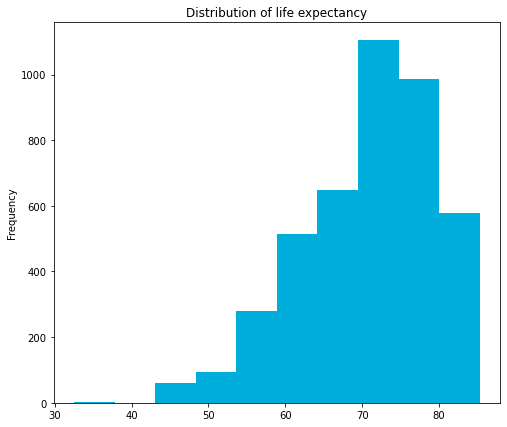

In [62]:
#checking the distribution of life expectancy 
plt.title('Distribution of life expectancy')
df_main.life_expectancy.plot(kind='hist',figsize=(8,7),color='#00AEDB');

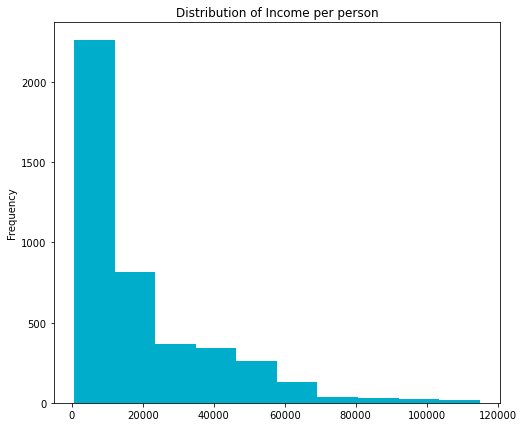

In [63]:
#checking the distribution of income per person
plt.title('Distribution of Income per person')
df_main.income_per_person.plot(kind='hist',figsize=(8,7),color='#00AECC');

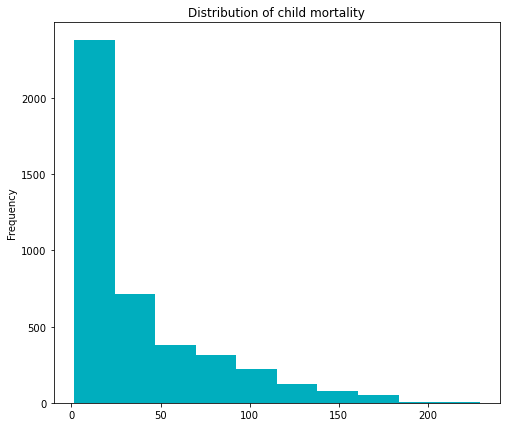

In [64]:
#checking the distribution of child mortality
plt.title('Distribution of child mortality')
df_main.child_mortality.plot(kind='hist',figsize=(8,7),color='#00AEBE');

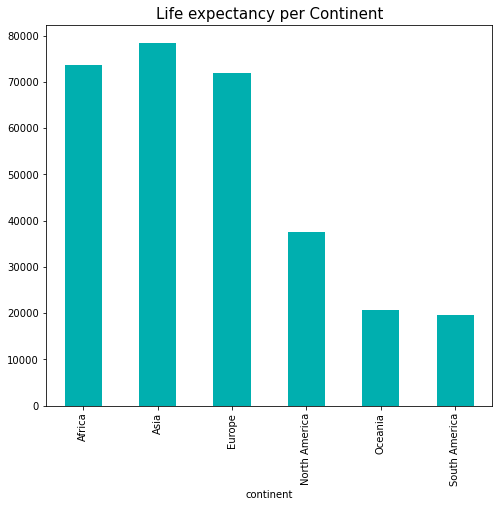

In [65]:
#plot life expectancy of each continent
plt.figure(figsize=(8,7))
plt.title("Life expectancy per Continent",fontsize=15)
df_main.groupby('continent')['life_expectancy'].sum().plot(kind='bar',color="#00AFAF");

**Bivariate Analysis**
- Income per person by continent
- Life expectancy by continent
- Child mortality by continent

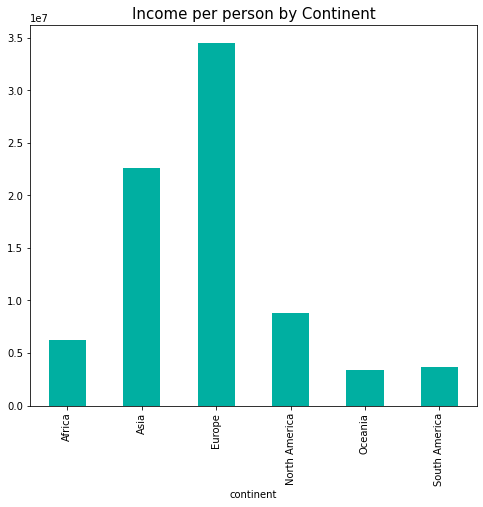

In [66]:
#plotting income per person by continent
plt.figure(figsize=(8,7))
plt.title("Income per person by Continent",fontsize=15)
df_main.groupby('continent')['income_per_person'].sum().plot(kind='bar',color="#00AFA1");

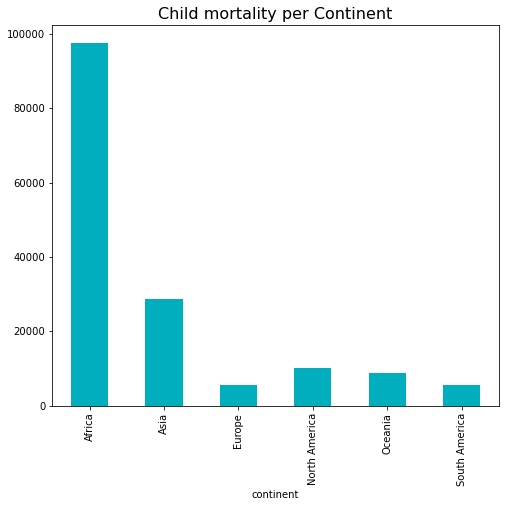

In [67]:
#plotting child mortality per continent
plt.figure(figsize=(8,7))
plt.title("Child mortality per Continent",fontsize=16)
df_main.groupby('continent')['child_mortality'].sum().plot(kind='bar',color="#00AEBE");

**Observation**
- From the life expectancy by continent chart, Asia has the highest life expectancy rate with South America having the lowest
- From the Income per person by continent chart, Europe has the highest income per person with Ocienia having the lowest.
- From the child mortality by continent chart, Africa has the highest child mortality rate with Europe and South America having the least.

>**The following line graph looks at the trend of each indicator over 22 years that is from 2001 to 2022 for each of the continents**.
This analysis looks at how the indicators namely life expectancy,income per person and child mortality changes over the years for each continent.

> **Multivariate Analysis**
 >- life expectancy from 2001 to 2022 for each continent
 >- Income per person from 2001 to 2022 for each continent
 >- Child mortality from 2001 to 2022 for each continent

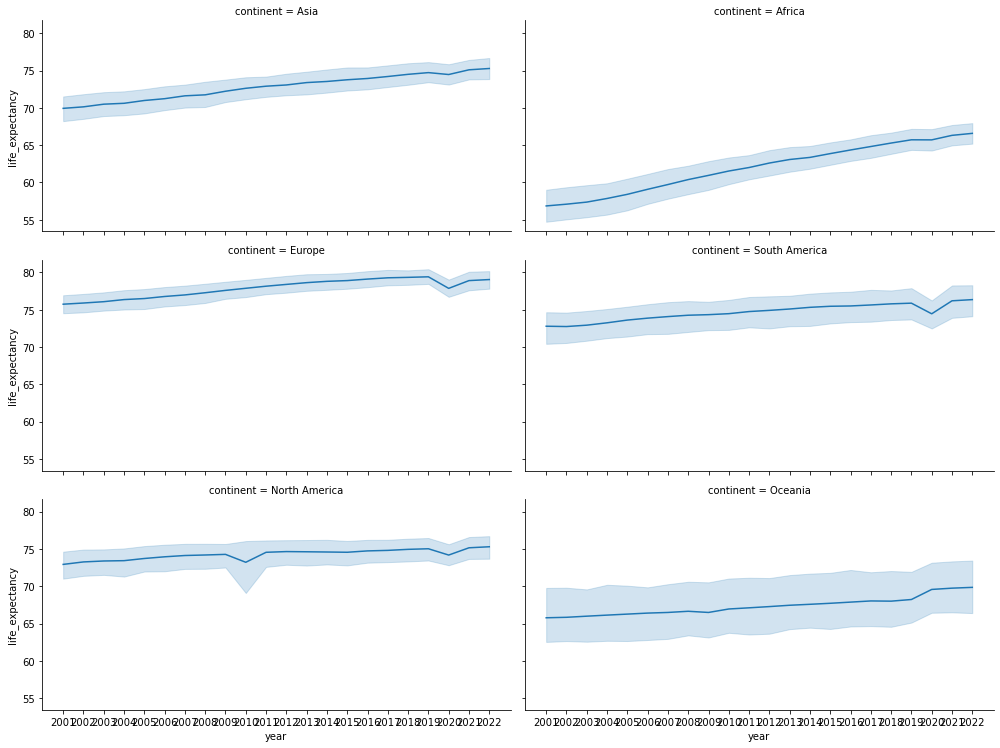

In [68]:
#graphing the trend for life expectancy over 22 years for each continent
graph = sns.FacetGrid(df_main, col="continent",col_wrap=2, height =3.5, aspect=2)
graph.map(sns.lineplot, "year", "life_expectancy")
plt.show()

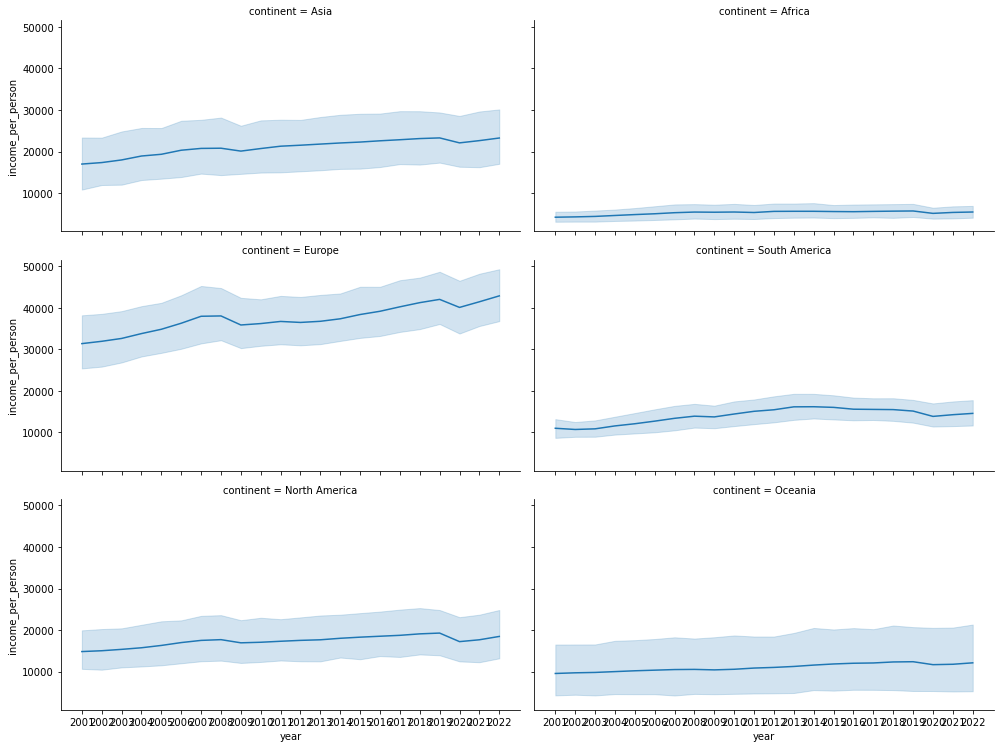

In [69]:
#graphing the trend for income per person over 22 years for each continent
graph = sns.FacetGrid(df_main, col="continent",col_wrap=2, height =3.5, aspect=2)
graph.map(sns.lineplot, "year", "income_per_person")
plt.show()

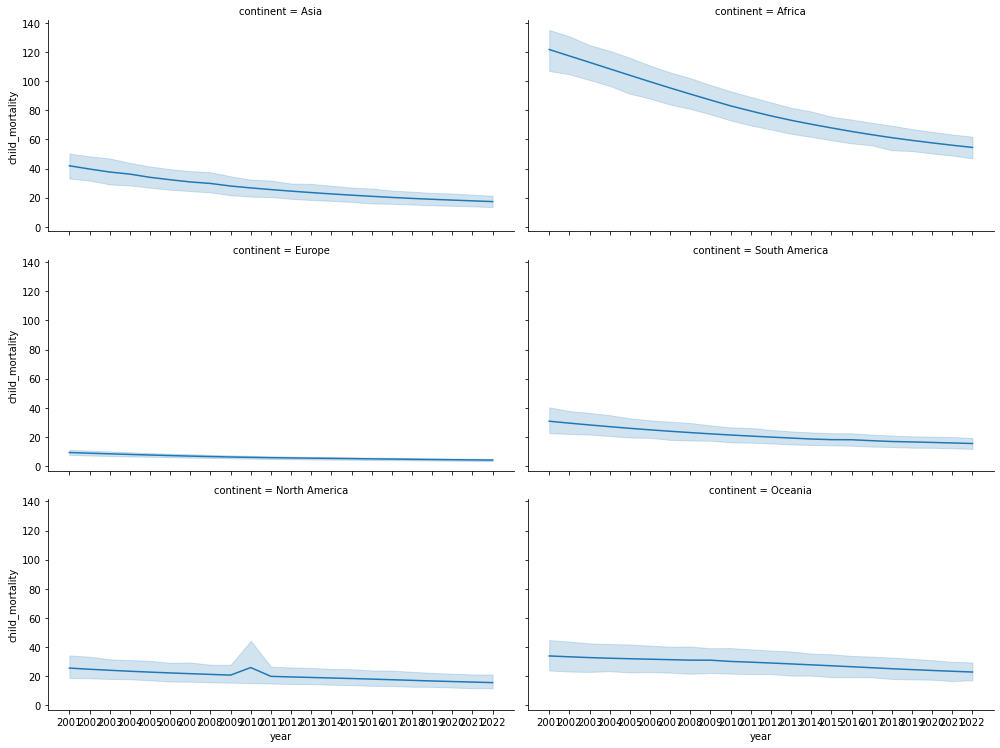

In [70]:
#graphing the trend for child mortality over 22 years that is from 2001 o 2022 for each continents
graph = sns.FacetGrid(df_main, col="continent",col_wrap=2, height =3.5, aspect=2)
graph.map(sns.lineplot, "year", "child_mortality")
plt.show()

**Relationships between the 3 indicators**
- Income per person and life expectancy
- Income per person and child mortality 
- life expectancy and child mortality 

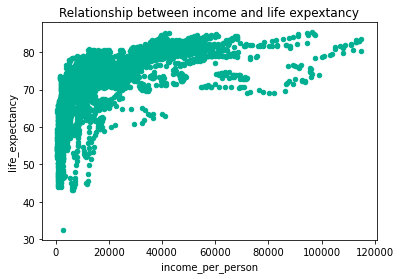

In [71]:
# is there a relationship between income and life expectancy?
df_main.plot(x='income_per_person',y='life_expectancy',kind='scatter',color='#00AF92').set(title='Relationship between income and life expextancy');

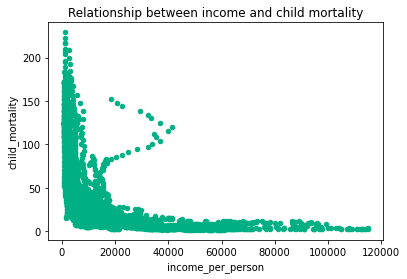

In [72]:
#is there a relationship between income and child mortality?
df_main.plot(x='income_per_person',y='child_mortality',kind='scatter',color='#00B084').set(title='Relationship between income and child mortality');

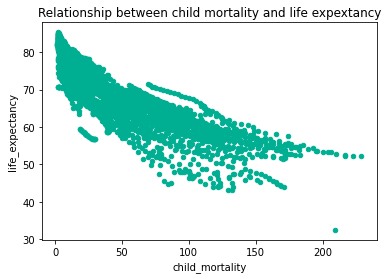

In [73]:
#is there a relation between child mortality and life expectancy?
df_main.plot(x='child_mortality',y='life_expectancy',kind='scatter',color='#00AF92').set(title='Relationship between child mortality and life expextancy');

**Observation**
- There is a positive correlation between income and life expectancy but it does not imply causation.
- There is a non linear association between income per person and child mortality.
- There is a negative correlation between life expectancy and child mortality.

<a id='conclusions'></a>
## Conclusions

>- Asia has the highest life expectancy rate with South America having the lowest
>- Europe has the highest income per person with Ocienia having the lowest.
>- Africa has the highest child mortality rate with Europe and South America having the least.
>- Life expectancy for Africa has been increasing gradually since 2001,which is the year with the least life expectancy.
>- Child mortality for Africa has dropped since 2001 which is the year with the highest chid mortality rate.
>- The average income per person for Africa has remained below 10000 dollars.
>- Child mortality rate has been gradually decreasing for all continents over the 22 years.
>- All continents experienced a drop in income per person in 2020.
>- Asia, Europe, South and North America experienced a drop in life expectancy in the year 2020.


### Limitations
 >- The Exploration does not look at countries individually , therefore statstical values for the various continents may not  represent some their respective countries. 
>- The exploration does not also look at the years individually to find statstical values for continents in each year 




Reference
- Matplotlib documentation
- Stack overflow
- Seaborn documentation
- geeksforgeeks.org